<a href="https://colab.research.google.com/github/RakeshKulungRai/Learning_Tensorflow/blob/main/03_introduction_to_computer_vision_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolution Neural Networks and Computer Vision with TensorFlow

Computer vision is the practive of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car reognizing the cat in from


## Get the data
The images we're working with are from the Food1010 dataset (101 different classes for foood) : https://www.kaggle.com/datasets/dansbecker/food-101 
However we've moddified it to only use two classes (pizza and steak) using the image data modification notebook:https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
> **Note:**  We start with a smaller dataset so we can experiement quickly and figure what works(or better yet what doesn't work) before scalling up

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-02-20 10:13:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 142.251.167.128, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   130MB/s    in 0.8s    

2023-02-20 10:13:15 (130 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become on with it)

A very crucial step at the begining of any machine learning project  is becoming one with the data
And for a computer vision project... this usially means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
import os
# Walk throug pizza_steak diretory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [6]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Feb 20 10:13 .
drwxr-xr-x 1 root root 4096 Feb 20 10:13 ..
drwxr-xr-x 4 root root 4096 Feb 20 10:13 test
drwxr-xr-x 4 root root 4096 Feb 20 10:13 train


In [7]:
# Another way to find out how many image in filw
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first' let's get the class names programmatically

In [8]:
# Get the classnames  programitacally
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirector


In [9]:
#lET VISUALIZE OUR images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir, target_class):
  target_folder = target_dir + "/"+target_class
  random_image = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f" Image shape:{img.shape}")
  return img

 Image shape:(384, 512, 3)


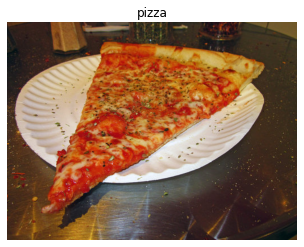

In [10]:
img=view_random_image(target_dir="pizza_steak/train",target_class="pizza")

In [11]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 88,  50,  27],
        [ 85,  47,  24],
        [ 85,  48,  22],
        ...,
        [110,  88,  38],
        [111,  90,  37],
        [112,  89,  37]],

       [[ 85,  47,  26],
        [ 85,  47,  24],
        [ 87,  47,  22],
        ...,
        [110,  88,  38],
        [111,  88,  38],
        [111,  88,  38]],

       [[ 84,  46,  25],
        [ 91,  50,  30],
        [ 93,  51,  27],
        ...,
        [110,  86,  38],
        [110,  87,  37],
        [110,  87,  37]],

       ...,

       [[ 69,  43,  28],
        [ 68,  42,  27],
        [ 68,  42,  27],
        ...,
        [ 76,  48,  26],
        [ 75,  47,  25],
        [ 74,  46,  24]],

       [[ 69,  43,  30],
        [ 68,  42,  29],
        [ 67,  41,  28],
        ...,
        [ 74,  50,  24],
        [ 74,  48,  21],
        [ 73,  47,  20]],

       [[ 70,  44,  31],
        [ 69,  43,  30],
        [ 67,  41,  28],
        ...,
        [ 68,  47,  1

In [12]:
# View image shape
img.shape

(384, 512, 3)

##An end-to-end example
let's build a convolutional neural network to find patterns in our images, more speciafically we a need way to:
* Load our image 
* Preprocess our images
* Build CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set the seed
tf.random.set_seed(42)
# Preprocess dat(get all pixel values between 0 and 1, and also called scaling/normalized)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

#Setup the path to our data directories
train_dir = "/content/pizza_steak/train"
test_dir ="pizza_steak/test"

# Import data from directories and trun it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

#Build a CNN model( same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=10,
                           activation="relu",
                           input_shape=(224,224, 3)),
                           tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

#Copile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_1= model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 30s 359ms/step - loss: 0.6374 - accuracy: 0.6300 - val_loss: 0.4901 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.5106 - accuracy: 0.7687 - val_loss: 0.4261 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.4697 - accuracy: 0.7900 - val_loss: 0.4490 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4557 - accuracy: 0.7940 - val_loss: 0.3895 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4434 - accuracy: 0.8027 - val_loss: 0.3788 - val_accuracy: 0.8400


In [14]:
len(valid_data)

16

In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 215, 215, 10)      3010      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 107, 107, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 105, 105, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 52, 52, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 10)        9

##Using the Same Model
[tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.35813&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)


In [16]:
#Set random seed
tf.random.set_seed(42)

#Create a model to replicate the Tensorflow palygroud model
model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(224,224,3)),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid")
    
    ]
)
# Compile
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_2= model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 180ms/step - loss: 0.9302 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 230ms/step - loss: 0.6932 - accuracy: 0.4893 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.4827 - val_loss: 0.6931 - val_accuracy: 0.5000


In [17]:
# Get the summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1),
model_2 works terribly .. let's try

In [18]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
        tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 177ms/step - loss: 4.0754 - accuracy: 0.6267 - val_loss: 0.5995 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 9s 198ms/step - loss: 1.0382 - accuracy: 0.6833 - val_loss: 0.9346 - val_accuracy: 0.7180
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 0.5852 - accuracy: 0.7640 - val_loss: 0.4265 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.5251 - accuracy: 0.7760 - val_loss: 0.4285 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.6312 - accuracy: 0.7473 - val_loss: 0.6712 - val_accuracy: 0.7480


In [19]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 215, 215, 10)      3010      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 107, 107, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 105, 105, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 52, 52, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 10)        9

## Binary Classification: Let's break it down

1. Become one with the data ( visualize, visualize, visualize)
2. Preprocess the data ( scaling/normalizing)
3. Create a model
4. fit the model 
5. evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Reapeat until satisfied (Experiment **3)

### 1. Become one with the data

 Image shape:(382, 512, 3)
 Image shape:(512, 512, 3)


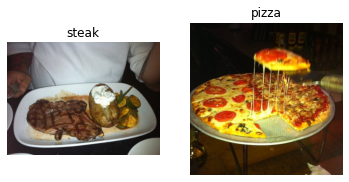

In [22]:
# Visualize
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [23]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir ="pizza_steak/test/"


Our next step is to turn our data into **batches.**

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.
It does this for a couple of reasons:
 1. 10,000 images (or more) might not fit into the memory of your processor(GPU).
 2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

 Why 32??

 Because 32 is good for health  


In [24]:
!nvidia-smi

Mon Feb 20 10:16:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    27W /  70W |   3180MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [25]:
from tensorflow.python.ops.math_ops import Imag
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [26]:
# Load in our image data from directories and trun them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size =(224,224),
                                               class_mode ="binary",
                                               batch_size=32)
test_data =  test_datagen.flow_from_directory(directory= test_dir,
                                            target_size =(224,224),
                                            class_mode ="binary",
                                            batch_size =32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/llabels in train_data
len(images), len(labels)

(32, 32)

In [28]:
# How many batches are there
len(train_data)

47

In [29]:
images[:2], images[0].shape


(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

### 3. Create the model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting

In [30]:
# Make Easier using import
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [31]:
model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3, #In TensorFlow, specifying a kernel_size of 3 in a convolutional layer means that the filter or kernel used for the convolutional operation will have a size of 3x3.
           strides =1, # STEP a filter takes across an image at a time default 1 
           padding ="valid",
           activation ="relu",
           input_shape=(224,224,3)), # Input layer (specify input shape)
           Conv2D(10, 3, activation ="relu"),
           Conv2D(10, 3, activation ="relu"),
           Flatten(),
           Dense(1, activation = "sigmoid") # output layer (working with binary so only classification so only one output)
]) 
model_4.compile()

In [32]:
model_4.compile(loss ="binary_crossentropy",
                optimizer = Adam(),
                metrics =["accuracy"])

In [33]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [34]:
len(train_data), len(test_data)

(47, 16)

In [35]:
history_4 = model_4.fit(train_data,
                        epochs =5,
                        steps_per_epoch =len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        )

Epoch 1/5
47/47 [==============================] - 15s 266ms/step - loss: 0.8295 - accuracy: 0.5093 - val_loss: 0.6699 - val_accuracy: 0.5460
Epoch 2/5
47/47 [==============================] - 17s 355ms/step - loss: 0.6135 - accuracy: 0.6580 - val_loss: 0.5342 - val_accuracy: 0.7380
Epoch 3/5
47/47 [==============================] - 11s 234ms/step - loss: 0.4733 - accuracy: 0.7760 - val_loss: 0.4485 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.3593 - accuracy: 0.8500 - val_loss: 0.4025 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 12s 254ms/step - loss: 0.2510 - accuracy: 0.9047 - val_loss: 0.4005 - val_accuracy: 0.8140


In [36]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 146ms/step - loss: 0.3788 - accuracy: 0.8400


[0.3788367509841919, 0.8399999737739563]

### 5. Evaluating our model


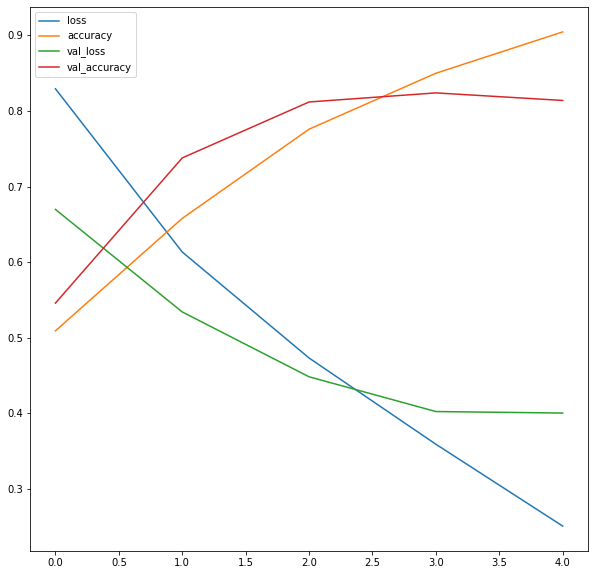

In [37]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,10))

In [38]:
# Ploting the validation and training curves seperately
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history['val_loss']

  accuracy = history.history["accuracy"]
  val_accuracy = history.history ["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  #Plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs, val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.legend()

  #Plot accuarcy
  plt.figure()
  plt.plot(epochs,accuracy,label="accuracy")
  plt.plot(epochs, val_accuracy,label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.legend()

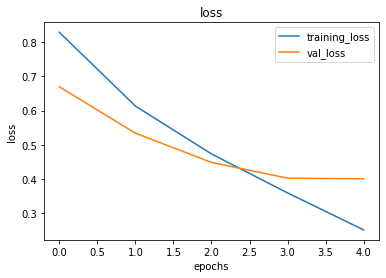

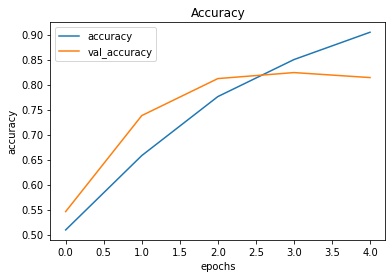

In [39]:
# Check loss and accuracy of model 4
plot_loss_curves(history_4)

### 6. Adjust the mode parameters
Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger mode
2. Reduce overfitting

Way to induce overfitting :
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers ( such as MaxPool2D)
* Add more data


In [40]:
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(10,3, activation ="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation ="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")   
])

In [41]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics =["accuracy"])

In [42]:
history_5 = model_5.fit(train_data,
                        epochs =5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 208ms/step - loss: 0.6486 - accuracy: 0.6093 - val_loss: 0.5044 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.4703 - accuracy: 0.7873 - val_loss: 0.3829 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 11s 227ms/step - loss: 0.4353 - accuracy: 0.8047 - val_loss: 0.3900 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3948 - accuracy: 0.8353 - val_loss: 0.3786 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3827 - accuracy: 0.8427 - val_loss: 0.3313 - val_accuracy: 0.8520


In [43]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 10)      

In [44]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


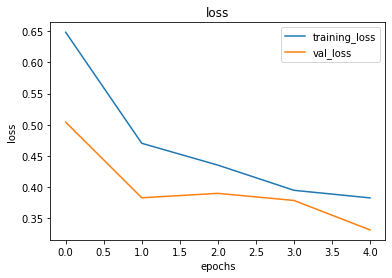

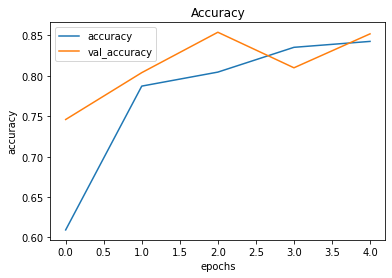

In [45]:
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [46]:
# Create ImageDatagenerator training  instance with data augmentation
train_datagen_augumented = ImageDataGenerator(rescale =1/255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range =0.2,
                                           height_shift_range =0.3,
                                           horizontal_flip=True)
# Create ImageDatagenerator without data augmentation
train_datagen = ImageDataGenerator(rescale =1/255.0)
test_datagen = ImageDataGenerator(rescale =1/255.0)

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to lear more generalizable patterns. Altering might mean adjusing the rotation of an image , flipping it cropping it or something similar.

Let's write some code to visualize data augmentation

In [47]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augumented.flow_from_directory(train_dir,
                                                                target_size =(224,224),
                                                                batch_size=32,
                                                                class_mode="binary",
                                                                shuffle=False
                                                                )
print("Non- augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode="binary",
                                               shuffle =False
                                                 )
print("Non-augmented test data ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size =(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False
                                             )


Augmented training data
Found 1500 images belonging to 2 classes.
Non- augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data 
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data. uSING `ImageDataGenerator` built-in data augmentation parameters our images are let as they are in the directories but are modified as they're loaded into the model



Visualize some augmented data!!

In [48]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

random number : 31


(-0.5, 223.5, 223.5, -0.5)

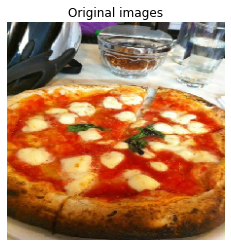

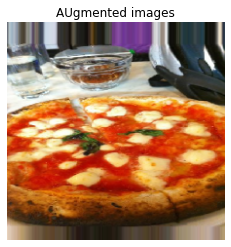

In [49]:
import random
random_number = random.randint(0, 32)
print(f"random number : {random_number}")
plt.imshow(images[random_number])
plt.title(f'Original images')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("AUgmented images")
plt.axis(False)

In [50]:
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size =2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation ="sigmoid")
])
model_6.compile(loss="binary_crossentropy",
                optimizer= Adam(),
                metrics =['accuracy'])
history_6= model_6.fit(train_data_augmented,
                       epochs =5,
                       steps_per_epoch = len(train_data_augmented),
                       validation_data = test_data,
                       validation_steps = len(test_data))


Epoch 1/5
47/47 [==============================] - 35s 722ms/step - loss: 0.7448 - accuracy: 0.4513 - val_loss: 0.6881 - val_accuracy: 0.5380
Epoch 2/5
47/47 [==============================] - 23s 483ms/step - loss: 0.6941 - accuracy: 0.5073 - val_loss: 0.6832 - val_accuracy: 0.6080
Epoch 3/5
47/47 [==============================] - 25s 533ms/step - loss: 0.6891 - accuracy: 0.5973 - val_loss: 0.6718 - val_accuracy: 0.6420
Epoch 4/5
47/47 [==============================] - 23s 485ms/step - loss: 0.6742 - accuracy: 0.6013 - val_loss: 0.6281 - val_accuracy: 0.7320
Epoch 5/5
47/47 [==============================] - 23s 492ms/step - loss: 0.6790 - accuracy: 0.5600 - val_loss: 0.6138 - val_accuracy: 0.7760


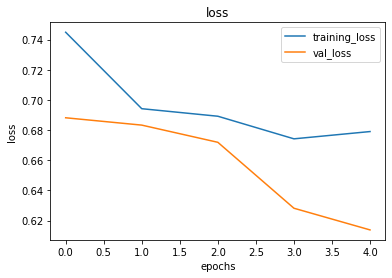

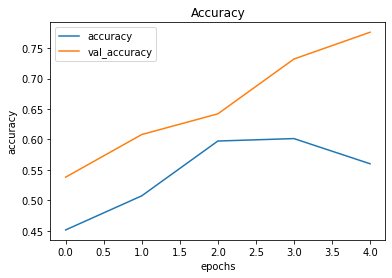

In [51]:
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the sam as before) on it and  see what happens.

In [52]:
train_data_augmented_shuffle = train_datagen_augumented.flow_from_directory(train_dir,
                                                                           target_size=(224,224),
                                                                           batch_size=32,
                                                                           class_mode="binary",
                                                                           shuffle=True
                                                                           )

Found 1500 images belonging to 2 classes.


In [53]:
model_7 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size =2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation ="sigmoid")
])
model_7.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics =['accuracy'])
history_7 = model_7.fit(train_data_augmented_shuffle,
                        epochs =5,
                        steps_per_epoch= len(train_data_augmented_shuffle),
                        validation_data= test_data,
                        validation_steps= len(test_data ))

Epoch 1/5
47/47 [==============================] - 24s 487ms/step - loss: 0.6434 - accuracy: 0.6233 - val_loss: 0.4836 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 22s 471ms/step - loss: 0.5305 - accuracy: 0.7333 - val_loss: 0.3984 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 24s 506ms/step - loss: 0.5097 - accuracy: 0.7480 - val_loss: 0.3770 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 23s 483ms/step - loss: 0.4937 - accuracy: 0.7747 - val_loss: 0.3504 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 23s 484ms/step - loss: 0.4522 - accuracy: 0.7947 - val_loss: 0.3345 - val_accuracy: 0.8460


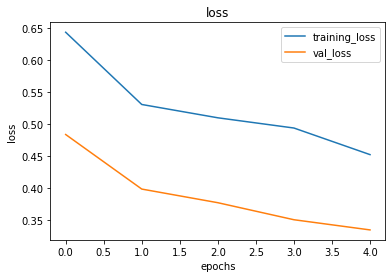

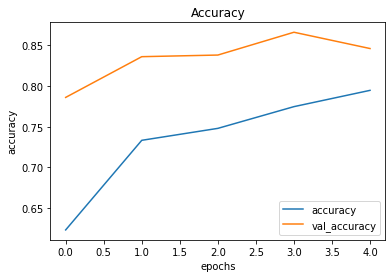

In [54]:
plot_loss_curves(history_7)

### 7. Repeat until satisfied

* Increase no of layers (eg. add more Conv2D, MaxPool2D)
* Increase the number of filters in each convolutional layer (eg. 10 to 32)
* Train for longer
* Find an ideal learning rate
* Get more dat
* Use ***transfer learning*

## Making a prediction with our trained model on our own custom data

In [55]:
print(class_names)

['pizza' 'steak']


--2023-02-20 10:22:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.008s  

2023-02-20 10:22:43 (249 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



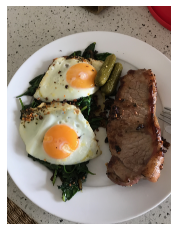

In [56]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [57]:
steak.shape

(4032, 3024, 3)

In [58]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [122]:
def load_and_prep_image(filename, img_shape=224):
  #read img
  img = tf.io.read_file(filename)
  #decode the read file into a tensor
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  #Rescale the image ( get all values between 0 and 1)
  img = img/255.
  return img

In [60]:
steak = load_and_prep_image("03-steak.jpeg")

steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [61]:
pred= model_7.predict(tf.expand_dims(steak, axis =0))
pred

1/1 [==============================] - 0s 182ms/step


array([[0.7595909]], dtype=float32)

In [62]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [121]:
def  pred_and_plot(model, filename, class_names= class_names):
  img = load_and_prep_image(filename)
  pred= model.predict(tf.expand_dims(img,axis=0))
  
  #Add logic on multiclass
  if len(pred[0])> 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class= class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 20ms/step


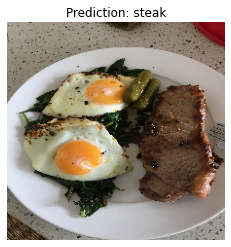

In [64]:
pred_and_plot(model_7, "03-steak.jpeg")

Try another 

--2023-02-20 10:22:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-02-20 10:22:45 (217 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 22ms/step


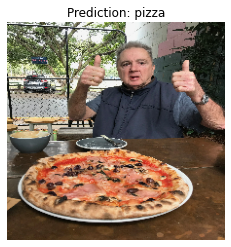

In [65]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_7, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 21ms/step


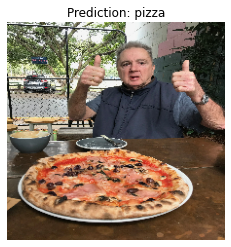

In [66]:
pred_and_plot(model_7, "03-pizza-dad.jpeg")

In [67]:
!wget https://thumbs.dreamstime.com/b/pizza-rustic-italian-mozzarella-cheese-basil-leaves-35669930.jpg

--2023-02-20 10:22:46--  https://thumbs.dreamstime.com/b/pizza-rustic-italian-mozzarella-cheese-basil-leaves-35669930.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 192.229.163.122
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|192.229.163.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136616 (133K) [image/jpeg]
Saving to: ‘pizza-rustic-italian-mozzarella-cheese-basil-leaves-35669930.jpg’

pizza-rustic-italia 100%[===================>] 133.41K  --.-KB/s    in 0.003s  

2023-02-20 10:22:46 (43.6 MB/s) - ‘pizza-rustic-italian-mozzarella-cheese-basil-leaves-35669930.jpg’ saved [136616/136616]



1/1 [==============================] - 0s 20ms/step


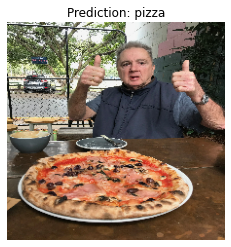

In [71]:
pred_and_plot(model_7, "03-pizza-dad.jpeg")

In [72]:
steak = load_and_prep_image("03-pizza-dad.jpeg")
steak
model_7.predict(tf.expand_dims(steak, axis =0))

1/1 [==============================] - 0s 22ms/step


array([[0.11025361]], dtype=float32)

# Multi-class image classification

1. Become one with the data
2. Preprocess the data 
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different hypermaters and improve the model
7. Repeat until satisfied

In [73]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

zip_ref =  zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-02-20 10:26:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.122.128, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   170MB/s    in 2.9s    

2023-02-20 10:26:40 (170 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [74]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories adn {len(filenames)} images in {dirpath}.")

There are 2 directories adn 0 images in 10_food_classes_all_data.
There are 10 directories adn 0 images in 10_food_classes_all_data/test.
There are 0 directories adn 250 images in 10_food_classes_all_data/test/fried_rice.
There are 0 directories adn 250 images in 10_food_classes_all_data/test/sushi.
There are 0 directories adn 250 images in 10_food_classes_all_data/test/chicken_curry.
There are 0 directories adn 250 images in 10_food_classes_all_data/test/chicken_wings.
There are 0 directories adn 250 images in 10_food_classes_all_data/test/pizza.
There are 0 directories adn 250 images in 10_food_classes_all_data/test/steak.
There are 0 directories adn 250 images in 10_food_classes_all_data/test/grilled_salmon.
There are 0 directories adn 250 images in 10_food_classes_all_data/test/ramen.
There are 0 directories adn 250 images in 10_food_classes_all_data/test/hamburger.
There are 0 directories adn 250 images in 10_food_classes_all_data/test/ice_cream.
There are 10 directories adn 0 ima

In [75]:
train_dir = "10_food_classes_all_data/train/"
test_dir =  "10_food_classes_all_data/test/"


In [76]:
# Class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


 Image shape:(512, 384, 3)


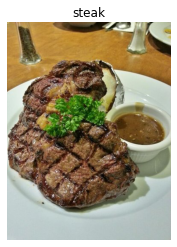

In [82]:
# Visualize **3
import random
img = view_random_image(target_dir= train_dir,
                        target_class= random.choice(class_names))


In [87]:
print([item.name for item in data_dir.glob("*")])

['fried_rice', 'sushi', 'chicken_curry', 'chicken_wings', 'pizza', 'steak', 'grilled_salmon', 'ramen', 'hamburger', 'ice_cream']


In [79]:
ls

03-pizza-dad.jpeg
03-steak.jpeg
10_food_classes_all_data/
10_food_classes_all_data.zip
__MACOSX/
pizza-rustic-italian-mozzarella-cheese-basil-leaves-35669930.jpg
pizza_steak/
pizza_steak.zip
sample_data/


In [80]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Feb 20 10:26 .
drwxr-xr-x  1 root root 4096 Feb 20 10:26 ..
drwxr-xr-x 12 root root 4096 Feb 20 10:26 test
drwxr-xr-x 12 root root 4096 Feb 20 10:26 train


###2. Preporcess the data

In [95]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale =1/255.)
test_datagen = ImageDataGenerator(rescale =1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size =(224,224),
                                               batch_size =32,
                                               class_mode ="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size =32,
                                             class_mode="categorical"
                                             )                                               

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model

In [97]:
model_8 = Sequential([
    Conv2D(10, 3,input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])
model_8.compile(loss="categorical_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

###4. Fit the model

In [99]:
history_8 = model_8.fit(train_data,
                            epochs=5,
                            steps_per_epoch=len(train_data),
                            validation_data = test_data,
                            validation_steps = len(test_data)
                            )

Epoch 1/5
235/235 [==============================] - 50s 205ms/step - loss: 2.1569 - accuracy: 0.2200 - val_loss: 1.9698 - val_accuracy: 0.3060
Epoch 2/5
235/235 [==============================] - 57s 244ms/step - loss: 1.9305 - accuracy: 0.3195 - val_loss: 1.8981 - val_accuracy: 0.3352
Epoch 3/5
235/235 [==============================] - 58s 249ms/step - loss: 1.7467 - accuracy: 0.3992 - val_loss: 1.8904 - val_accuracy: 0.3404
Epoch 4/5
235/235 [==============================] - 46s 196ms/step - loss: 1.2730 - accuracy: 0.5863 - val_loss: 2.1218 - val_accuracy: 0.3172
Epoch 5/5
235/235 [==============================] - 60s 255ms/step - loss: 0.5878 - accuracy: 0.8112 - val_loss: 3.0666 - val_accuracy: 0.2780


### 5. Evaluate the  model

In [102]:
model_8.evaluate(test_data)

79/79 [==============================] - 11s 140ms/step - loss: 3.0666 - accuracy: 0.2780


[3.066563606262207, 0.27799999713897705]

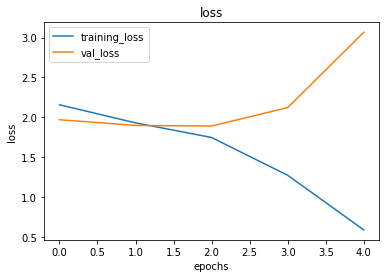

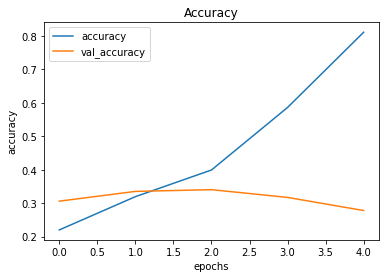

In [103]:
plot_loss_curves(history_8)

###6. Adjust the model hyperparameters (to beat the baselin / reduce overfitting)

fix overfitting by
* Get more data
* Simpliy the model
*  use data augmentation
* Use transfer learning

In [104]:
model_9 = Sequential([
     Conv2D(10, 3, activation ="relu", input_shape=(224,224,3)),
     MaxPool2D(),
     Conv2D(10, 3, activation ="relu"),
     MaxPool2D(),
     Flatten(),
     Dense(10, activation ="softmax")
 ])
model_9.compile(loss="categorical_crossentropy",
                optimizer = Adam(),
                metrics =["accuracy"])

In [105]:
history_9 = model_9.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 231ms/step - loss: 2.2511 - accuracy: 0.1920 - val_loss: 2.0737 - val_accuracy: 0.2652
Epoch 2/5
235/235 [==============================] - 46s 195ms/step - loss: 1.8888 - accuracy: 0.3557 - val_loss: 1.9805 - val_accuracy: 0.3152
Epoch 3/5
235/235 [==============================] - 46s 197ms/step - loss: 1.5696 - accuracy: 0.4805 - val_loss: 2.0552 - val_accuracy: 0.3096
Epoch 4/5
235/235 [==============================] - 45s 190ms/step - loss: 1.1388 - accuracy: 0.6329 - val_loss: 2.3377 - val_accuracy: 0.2756
Epoch 5/5
235/235 [==============================] - 46s 198ms/step - loss: 0.6740 - accuracy: 0.8007 - val_loss: 2.7096 - val_accuracy: 0.2804


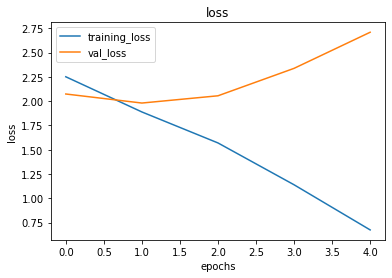

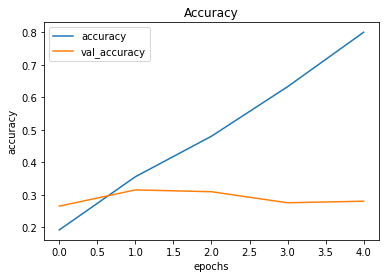

In [106]:
plot_loss_curves(history_9)

In [108]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range =0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip =True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode ="categorical")



Found 7500 images belonging to 10 classes.


In [110]:
model_10 = tf.keras.models.clone_model(model_8)
model_10.compile(loss="categorical_crossentropy",
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics =["accuracy"])

In [111]:
model_10.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [113]:
history_10 = model_10.fit(train_data_augmented,
                          epochs =5,
                          steps_per_epoch = len(train_data_augmented),
                          validation_data = test_data,
                          validation_steps = len(test_data)
                          )

Epoch 1/5
235/235 [==============================] - 128s 541ms/step - loss: 1.9840 - accuracy: 0.3120 - val_loss: 1.7626 - val_accuracy: 0.3916
Epoch 2/5
235/235 [==============================] - 118s 500ms/step - loss: 1.9079 - accuracy: 0.3407 - val_loss: 1.8424 - val_accuracy: 0.3700
Epoch 3/5
235/235 [==============================] - 114s 485ms/step - loss: 1.8823 - accuracy: 0.3520 - val_loss: 1.7629 - val_accuracy: 0.4084
Epoch 4/5
235/235 [==============================] - 114s 483ms/step - loss: 1.8601 - accuracy: 0.3655 - val_loss: 1.7291 - val_accuracy: 0.4224
Epoch 5/5
235/235 [==============================] - 113s 483ms/step - loss: 1.8291 - accuracy: 0.3749 - val_loss: 1.6722 - val_accuracy: 0.4492


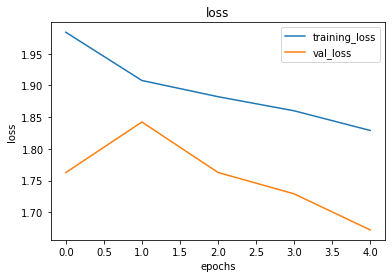

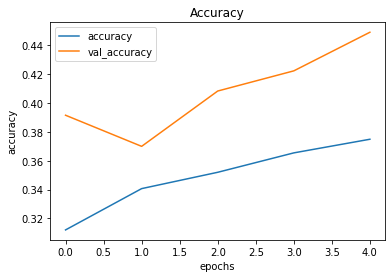

In [115]:
plot_loss_curves(history_10)

### 7. Repeat until satisfied


In [116]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

--2023-02-20 12:25:42--  ftp://data/image/jpeg
           => ‘jpeg’
Resolving data (data)... failed: No address associated with hostname.
wget: unable to resolve host address ‘data’
/bin/bash: base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBQUFBgUFBIZGBgYGhoaGRgaGBgYGxgbGhkZGRoZGhgbIS0kHB0qIRgYJTclKi4xNDQ0GyM6PzoyPi0zNDEBCwsLEA8QHxISHzMrIyYzMzYzMzMxMzMzMzUzMTMzMzMzNTMzMzMzMTM0MzMzMzMzMzE1MzMzMzQzMzMzMzMzM//AABEIALUBFwMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAAAQIEBQYDBwj/xABKEAACAQIEAwQGBQgHBgcAAAABAhEAAwQSITEFQVEGImFxEzKBkaHwBxRCscEVI1KSlNHT4RZTYnKChNIzRFWywvEkQ1RjhaLD/8QAGgEAAwEBAQEAAAAAAAAAAAAAAAECAwQFBv/EACwRAAICAQQBBAAFBQEAAAAAAAABAhEDBBIhMUETFFFhIjKBoeEjcZHB0QX/2gAMAwEAAhEDEQA/APGaKKKYBRRRQAUUUUAFFFFABS0UUhhRRRQMWjWiaJoAWT8ilzH5ApA1KH8KB2Gc/IFGc/IFLm8Pn3UZ/D4/yoATMfkCkk0ubwpC1ABJomjNRNMLCiiaJpAIaSlJopiEpKWkoEFFFFAgooooAKKKKACiiigAooooAKKKKACiiigApaQUopDQUtKFrtbsFth4UWUonGKULWt4X2Fxl1c5t+jSJz3TkEf3YL+3LFa7hn0a2Vg3r7PzItgIsaaS0seeoipc0i1jbPJ1sk8qemGJMDU9BqfdXueG7M4G3GTCoxHN/wA57e+SJ+Yq

1/1 [==============================] - 0s 117ms/step


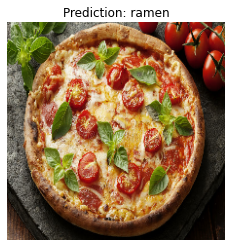

In [128]:
pred_and_plot(model=model_10, filename="piz.jpg",class_names = class_names)

In [124]:
#Note woking with custom image

#Saving and loading our model

In [126]:
model_10.save("save_trained_model_10")

In [127]:
#Load in a trainde model and evaluate it
loaded_model_10 = tf.keras.models.load_model("save_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 12s 150ms/step - loss: 1.6722 - accuracy: 0.4492


[1.672194480895996, 0.44920000433921814]